# Flight Performance Analysis for an RV-8 Aircraft

This notebook can also be [viewed as a web page](http://nbviewer.jupyter.org/github/briandwendt/Flight-Performance-Analysis/blob/master/RV-8F%20Performance.ipynb).

In [1]:
%run ./python/nb_init.py
%run ./python/isa.py
unit.load_definitions('./python/pint_addons.txt') # includes slug

## Required Software

* [Anaconda Python Distribution](https://www.continuum.io/downloads), includes NumPy, Pandas, SciPy, Matplotlib, etc.
* [Jupyter Notebook](http://jupyter.org/), to display and edit this document, included with Anaconda.
* [Seaborn Data Visualization](http://seaborn.pydata.org/), for plotting aesthetics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
# Plot style with Seaborn
%matplotlib inline
sns.set_context("paper", font_scale=1.8, rc={"lines.linewidth": 3, "figure.figsize": (10,6)})
sns.set_style("ticks")

## Aircraft Specifications
Van RV-8 Kit Aircraft. Ref: https://www.vansaircraft.com/public/rv8specs.htm

In [4]:
# Wing span (ft)
b = ( 24 *unit.ft ).to(unit.m)

# Wing area (sq ft) 
S = ( 116 *unit.sq_ft ).to(unit.m**2)

# Wing chord (constant, no taper)
c = S/b

# Aspect ratio
AR = b**2/S

# Gross weight (lbs)
W = ( 1800 *unit.lbf ).to(unit.newton)

# Wing loading (lb/sq ft)
WL = W/S

# Fuel capacity (US gal)
fuel_capacity = ( 42 *unit.gallon ).to(unit.m**3)

## Zero-Lift Drag and Oswald Efficiency
Initially, we cheat a bit here, using data derived by Kevin Horton in his [AeroCalc](https://github.com/khorton/AeroCalc_Package/blob/master/aerocalc/personal/ft_data_reduction.py) Python package.

In [5]:
# Oswald efficiency factor estimation (ref: D. Raymer [2], Eqn. (12.49), p. 347.)
e = 1.78 * (1 - 0.045 * AR**0.68) - 0.64

# Oswald efficiency factor estimation (ref.: K. Horton)
e = 0.86

# Parasite drag coefficient, zero-lift (ref.: K. Horton)
C_d_0 = 0.0209

## Free Stream Velocity
A range of likely velocity values for a light aircraft, from about 60 to 220 KTAS (knots true airspeed).

In [6]:
# Free stream velocity (ft/s)
V = ( np.arange(100,370)*unit.ft/unit.sec ).to(unit.m/unit.sec)

In [7]:
V

<Quantity([  30.48     30.7848   31.0896   31.3944   31.6992   32.004    32.3088
   32.6136   32.9184   33.2232   33.528    33.8328   34.1376   34.4424
   34.7472   35.052    35.3568   35.6616   35.9664   36.2712   36.576
   36.8808   37.1856   37.4904   37.7952   38.1      38.4048   38.7096
   39.0144   39.3192   39.624    39.9288   40.2336   40.5384   40.8432
   41.148    41.4528   41.7576   42.0624   42.3672   42.672    42.9768
   43.2816   43.5864   43.8912   44.196    44.5008   44.8056   45.1104
   45.4152   45.72     46.0248   46.3296   46.6344   46.9392   47.244
   47.5488   47.8536   48.1584   48.4632   48.768    49.0728   49.3776
   49.6824   49.9872   50.292    50.5968   50.9016   51.2064   51.5112
   51.816    52.1208   52.4256   52.7304   53.0352   53.34     53.6448
   53.9496   54.2544   54.5592   54.864    55.1688   55.4736   55.7784
   56.0832   56.388    56.6928   56.9976   57.3024   57.6072   57.912
   58.2168   58.5216   58.8264   59.1312   59.436    59.7408   60.0456
   60.3504   60.6552   60.96     61.2648   61.5696   61.8744   62.1792
   62.484    62.7888   63.0936   63.3984   63.7032   64.008    64.3128
   64.6176   64.9224   65.2272   65.532    65.8368   66.1416   66.4464
   66.7512   67.056    67.3608   67.6656   67.9704   68.2752   68.58
   68.8848   69.1896   69.4944   69.7992   70.104    70.4088   70.7136
   71.0184   71.3232   71.628    71.9328   72.2376   72.5424   72.8472
   73.152    73.4568   73.7616   74.0664   74.3712   74.676    74.9808
   75.2856   75.5904   75.8952   76.2      76.5048   76.8096   77.1144
   77.4192   77.724    78.0288   78.3336   78.6384   78.9432   79.248
   79.5528   79.8576   80.1624   80.4672   80.772    81.0768   81.3816
   81.6864   81.9912   82.296    82.6008   82.9056   83.2104   83.5152
   83.82     84.1248   84.4296   84.7344   85.0392   85.344    85.6488
   85.9536   86.2584   86.5632   86.868    87.1728   87.4776   87.7824
   88.0872   88.392    88.6968   89.0016   89.3064   89.6112   89.916
   90.2208   90.5256   90.8304   91.1352   91.44     91.7448   92.0496
   92.3544   92.6592   92.964    93.2688   93.5736   93.8784   94.1832
   94.488    94.7928   95.0976   95.4024   95.7072   96.012    96.3168
   96.6216   96.9264   97.2312   97.536    97.8408   98.1456   98.4504
   98.7552   99.06     99.3648   99.6696   99.9744  100.2792  100.584
  100.8888  101.1936  101.4984  101.8032  102.108   102.4128  102.7176
  103.0224  103.3272  103.632   103.9368  104.2416  104.5464  104.8512
  105.156   105.4608  105.7656  106.0704  106.3752  106.68    106.9848
  107.2896  107.5944  107.8992  108.204   108.5088  108.8136  109.1184
  109.4232  109.728   110.0328  110.3376  110.6424  110.9472  111.252
  111.5568  111.8616  112.1664  112.4712], 'meter / second')>

## U.S. Standard Atmosphere

The `scikit-aero` COESA algorithm is based on the [1976 U.S. Standard Atmosphere](http://ntrs.nasa.gov/search.jsp?R=19770009539).  The previous 1962 U.S. Standard Atmosphere is the standard used by the FAA and the flight test community for aircraft performance assessments, however the updated 1976 version differs from this only above 32 km [[1](#ref)].

Compare computed results here with an online [Standard Atmosphere Calculator](https://www.digitaldutch.com/atmoscalc/).

In [8]:
# COESA 1976 U.S. Standard Atmosphere (SI units!)

# Altitude to test (ft)
altitude = 23000 *unit.ft

# Air density (kg/m^3)
#rho = atm.density(altitude * 0.3048)
temperature, soundspeed, pressure, density = isa(altitude.to(unit.m))

# Compare computed results with: https://www.digitaldutch.com/atmoscalc/
print("Air properties at altitude h = {:.1fP} ({:.1fP})".format(altitude.to(unit.m),altitude.to(unit.ft)))
print(" T = {:.6P}\n a = {:.5P}\n p = {:.4P}\n rho = {:.4fP}".format(temperature, soundspeed, pressure, density))

Air properties at altitude h = 7010.4 meter (23000.0 foot)
 T = 242.582 kelvin
 a = 312.2 meter/second
 p = 4.099e+04 newton/meter²
 rho = 0.5888 kilogram/meter³


## The Drag Polar

Equations from Anderson [3].

\begin{equation} \tag{1}
  C_L = \frac{W}{\frac{1}{2} \rho_{\infty} V_{\infty}^2 S}
\end{equation}

\begin{equation} \tag{2}
  C_D = C_{D,0} + \frac{C_L^2}{\pi e AR}
\end{equation}



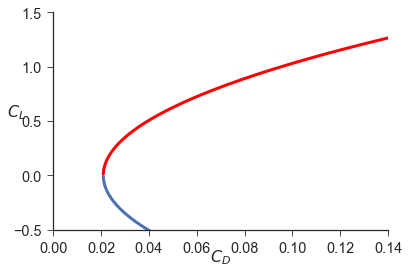

In [9]:
def plot_drag_polar():
    """
    Plot drag polar for altitudes from sea level to Max_Alt in 4,000-ft increments.
    """
    # This range allows the +/- curves to meet in the middle
    V_ = (np.arange(10,1000)*unit.knot_international).to(unit.m/unit.sec)
        
    # COESA 1976 U.S. Standard Atmosphere (SI units!)
    # Air density (kg/m^3)
    T, a, p, rho = isa(altitude.to(unit.m))

    # Lift coefficient
    CL = W / (0.5 * rho * V_**2 * S)

    # Drag coefficient
    CD = C_d_0 + CL**2 / (np.pi * e * AR)

    # Add a curve
    plt.plot(CD,CL)
    plt.plot(CD,-CL,color="#4c72b0")
 
    # Locate the axis labels and limits
    ax = plt.gca()
    ax.set_xlim([0,0.14])
    ax.set_ylim([-0.5,1.5])
    ax.xaxis.set_label_coords(0.5, -0.08)
    ax.yaxis.set_label_coords(-0.11, 0.5)
    
    # Add title and axis labels
    #plt.title("\n Drag Polar, RV-8, 1800 lbs \n")
    plt.ylabel(r'$C_L$', rotation=0)
    plt.xlabel(r'$C_D$')
    sns.despine()
    plt.show()

plot_drag_polar()

## Thrust Required for Level Flight

Equations from Anderson [3].

\begin{equation} \tag{3}
  T = D = q_{\infty} S \, C_D
\end{equation}

\begin{equation} \tag{4}
  L = W = q_{\infty} S \, C_L
\end{equation}

\begin{equation} \tag{5}
  \frac{T}{W} = \frac{C_D}{C_L}
\end{equation}

\begin{equation} \tag{6}
  T_R = \frac{W}{C_L/C_D}
\end{equation}

Eqn. (6) gives the required thrust.

In [10]:
V

<Quantity([  30.48     30.7848   31.0896   31.3944   31.6992   32.004    32.3088
   32.6136   32.9184   33.2232   33.528    33.8328   34.1376   34.4424
   34.7472   35.052    35.3568   35.6616   35.9664   36.2712   36.576
   36.8808   37.1856   37.4904   37.7952   38.1      38.4048   38.7096
   39.0144   39.3192   39.624    39.9288   40.2336   40.5384   40.8432
   41.148    41.4528   41.7576   42.0624   42.3672   42.672    42.9768
   43.2816   43.5864   43.8912   44.196    44.5008   44.8056   45.1104
   45.4152   45.72     46.0248   46.3296   46.6344   46.9392   47.244
   47.5488   47.8536   48.1584   48.4632   48.768    49.0728   49.3776
   49.6824   49.9872   50.292    50.5968   50.9016   51.2064   51.5112
   51.816    52.1208   52.4256   52.7304   53.0352   53.34     53.6448
   53.9496   54.2544   54.5592   54.864    55.1688   55.4736   55.7784
   56.0832   56.388    56.6928   56.9976   57.3024   57.6072   57.912
   58.2168   58.5216   58.8264   59.1312   59.436    59.7408   60.0456
   60.3504   60.6552   60.96     61.2648   61.5696   61.8744   62.1792
   62.484    62.7888   63.0936   63.3984   63.7032   64.008    64.3128
   64.6176   64.9224   65.2272   65.532    65.8368   66.1416   66.4464
   66.7512   67.056    67.3608   67.6656   67.9704   68.2752   68.58
   68.8848   69.1896   69.4944   69.7992   70.104    70.4088   70.7136
   71.0184   71.3232   71.628    71.9328   72.2376   72.5424   72.8472
   73.152    73.4568   73.7616   74.0664   74.3712   74.676    74.9808
   75.2856   75.5904   75.8952   76.2      76.5048   76.8096   77.1144
   77.4192   77.724    78.0288   78.3336   78.6384   78.9432   79.248
   79.5528   79.8576   80.1624   80.4672   80.772    81.0768   81.3816
   81.6864   81.9912   82.296    82.6008   82.9056   83.2104   83.5152
   83.82     84.1248   84.4296   84.7344   85.0392   85.344    85.6488
   85.9536   86.2584   86.5632   86.868    87.1728   87.4776   87.7824
   88.0872   88.392    88.6968   89.0016   89.3064   89.6112   89.916
   90.2208   90.5256   90.8304   91.1352   91.44     91.7448   92.0496
   92.3544   92.6592   92.964    93.2688   93.5736   93.8784   94.1832
   94.488    94.7928   95.0976   95.4024   95.7072   96.012    96.3168
   96.6216   96.9264   97.2312   97.536    97.8408   98.1456   98.4504
   98.7552   99.06     99.3648   99.6696   99.9744  100.2792  100.584
  100.8888  101.1936  101.4984  101.8032  102.108   102.4128  102.7176
  103.0224  103.3272  103.632   103.9368  104.2416  104.5464  104.8512
  105.156   105.4608  105.7656  106.0704  106.3752  106.68    106.9848
  107.2896  107.5944  107.8992  108.204   108.5088  108.8136  109.1184
  109.4232  109.728   110.0328  110.3376  110.6424  110.9472  111.252
  111.5568  111.8616  112.1664  112.4712], 'meter / second')>

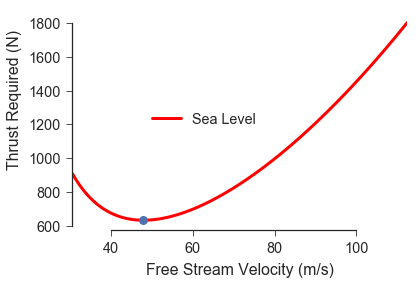

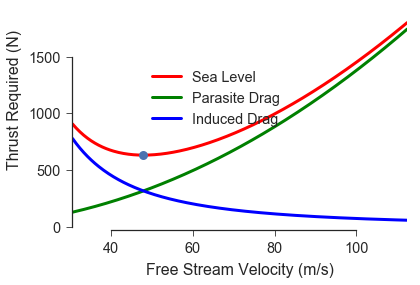

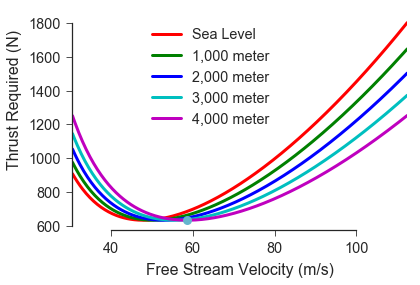

In [11]:
def plot_thrust_required(vel, Max_Alt=0*unit.m, min_color="#4c72b0", drag_curves='N'):
    """
    Plot thrust required curves for altitudes from sea level to Max_Alt in 1000-m increments.
    
    Keyword arguments:
    vel -- a 1D array of velocity values in m/s
    Max_Alt -- an altitude, in m, at which to stop plotting curves (default 0, sea level)
    min_color -- a hex color code for the min value marker
    drag_curves -- include drag curves? 'Y' or 'N'
    """
    legend = ['Sea Level']
    for altitude_ in range(0, math.floor(Max_Alt.magnitude) + 1, 1000):
        
        # COESA 1976 U.S. Standard Atmosphere (SI units!)
        #  Air density (kg/m^3)
        T, a, p, rho = isa(altitude_*unit.m)
        
        # Lift coefficient
        CL = W / (0.5 * rho * vel**2 * S)
        
        # Drag coefficient
        CD = C_d_0 + CL**2 / (np.pi * e * AR)
        
        # Lift force
        L = CL * 0.5 * rho * vel**2 * S
        
        # Parasite drag
        Dp = 0.5 * C_d_0 * rho * vel**2 * S
        
        # Induced drag
        Di = (2 * L**2) / (rho * vel**2 * S * np.pi * e * AR)
        
        # Thrust required (lbs)
        Tr = W / (CL / CD)
        
        # Add a curve
        plt.plot(V,Tr)
        
        # Plot drag curves
        if drag_curves == "Y":
            plt.plot(V,Dp)
            plt.plot(V,Di)
            legend.append("Parasite Drag")
            legend.append("Induced Drag")
        
        # Update the legend
        if altitude_ > 0:
            legend.append("{:,.0f}".format(altitude_*unit.m))
 
    # Locate the axis labels and limits
    ax = plt.gca()
    plt.xlim([np.amin(vel.magnitude),np.amax(vel.magnitude)])
    #ax.set_ylim([0,500])
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.yaxis.set_label_coords(-0.15, 0.6)
    #ax.text(165, 95, 'Best Range', size=13)
    
    # Add title and axis labels
    plt.legend(legend,loc=(0.22, 0.45))
    #plt.title("\n Thrust Required for Level Flight \n")
    plt.ylabel('Thrust Required (N)', rotation=90)
    plt.xlabel('Free Stream Velocity (m/s)')
    
    # Plot (L/D)max point
    plt.plot(V[np.argmin(Tr)], np.amin(Tr), marker='o', ms=9, color=min_color)
    
    sns.despine(trim=True)
    plt.show()

plot_thrust_required(V,0*unit.m)
plot_thrust_required(V,0*unit.m,"#4c72b0","Y")
plot_thrust_required(V,(16000*unit.ft).to(unit.m),"#64b5cd")

## Power Required for Level Flight

In [12]:
def plot_power_required(vel, Max_Alt=0, min_color="#4c72b0"):
    """
    Plot power required curves for altitudes from sea level to Max_Alt in 4,000-ft increments.
    
    Keyword arguments:
    vel -- a 1D array of velocity values in ft/s
    Max_Alt -- an altitude, in feet, at which to stop plotting curves (default 0, sea level)
    min_color -- a hex color code for the min value marker
    """
    legend = ['Sea Level']
    for altitude in range(0, Max_Alt + 1, 4000):
        
        # COESA 1976 U.S. Standard Atmosphere (SI units!)
        # Air density (kg/m^3)
        rho = atm.density(altitude * 0.3048)
        
        # Air density (slugs/ft^3)
        rho = rho * 0.00194032
        
        # Lift coefficient
        CL = W / (0.5 * rho * V**2 * S)
        
        # Drag coefficient
        CD = C_d_0 + CL**2 / (np.pi * e * AR)
        
        # Thrust required (lbs)
        Tr = W / (CL / CD)
        
        # Power required (hp)
        Pr = (Tr * V) / 550
        
        # Add a curve (1 ft/s = 0.592484 knots)
        plt.plot(V*0.592484,Pr)
        
        # Update the legend
        if altitude > 0:
            legend.append("{:,.0f} ft".format(altitude))
 
    # Locate the axis labels and limits
    ax = plt.gca()
    ax.set_xlim([25,250])
    ax.set_ylim([0,300])
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    #ax.text(75, 15, 'Best Endurance', size=13)
    
    # Add title and axis labels
    plt.legend(legend,loc=(0.12, 0.4))
    #plt.title("\n Power Required for Level Flight \n")
    plt.ylabel('Power\nRequired\n(hp)', rotation=0)
    plt.xlabel('Free Stream Velocity (knots)')
    
    # Plot (L/D)max point
    #plt.plot(V[np.argmin(Pr)]*0.592484, np.amin(Pr), marker='o', ms=9, color=min_color)
    sns.despine()
    plt.show()

plot_power_required(V,0)
plot_power_required(V,16000,"#64b5cd")

NameError: name 'atm' is not defined

## Propeller Efficiency

In [ ]:
def prop_eta(D=82, eta_guess=0.9, P=300, V=50, altitude=0, es=0.0001):
    """
    Estimate propeller efficiency using a numerical method (ref: Solies [9]).
    
    Keyword arguments:
    D -- propeller diameter, inches
    eta_guess -- an initial guess of propeller efficiency, percent
    P -- engine brake horsepower available at selected altitude
    V -- a velocity or array of velocities in knots
    altitude -- operating altitude, feet
    es -- percent error at which solution converges (smaller = more iterations)
    """
    
    # Propulsive disk area, ft^2
    A = (np.pi * (D/12)**2) / 4
    
    # COESA 1976 U.S. Standard Atmosphere (SI units!)
    # Air density (kg/m^3)
    rho = atm.density(altitude * 0.3048)

    # Air density (slugs/ft^3)
    rho = rho * 0.00194032
    
    # Convert V from knots to ft/s
    V = V * 1.68781
    
    # Convert P from hp to ft*lb/s
    P = P * 550
    
    # Initial error, %
    ea = 100
    
    # Initial guess
    eta_0 = eta_guess
    
    while np.any(ea) > es:
    
        # (2) Propeller thrust, lbs
        T = (eta_0 * P) / V

        # (3) Velocity at the propeller disk is V + dV/2
        dV_by_2 = -(V/2) + np.sqrt((V**2)/4 + T/(2 * rho * A))

        # (4) New efficiency
        eta_i = V / (V + dV_by_2)

        # (1) New eta
        eta = eta_guess * eta_i

        # Error
        ea = np.abs((eta - eta_0)/eta) * 100
        
        if np.any(ea) > es:
            eta_0 = eta
    
    return eta

In [ ]:
# From Lycoming O-360 manual, Fig. 3-26, "Sea Level and Altitude Performance, IO-360-M1B"
io360_bhp ={0:180, 4000:160, 8000:140, 12000:120, 16000:100, 20000:90}

# Hartzell propeller diameter, inches
D = 74

## Power Available and Maximum Velocity

In [ ]:
# Velocity range to cross power req'd curve
V_range_0 = np.arange(173,193,5)
V_range_8 = np.arange(170,190,5)

# Propeller efficiency at Sea Level
eta_0 = prop_eta(D, 0.9, io360_bhp[0], V_range_0, 0)

# Propeller efficiency, 16000
eta_8 = prop_eta(D, 0.9, io360_bhp[8000], V_range_8, 8000)

In [ ]:
def plot_max_speed(V, altitude, V_range, BHPa, prop_eta):
    """
    Plot 
    
    Keyword arguments:
    V -- 
    """
    legend = ['Sea Level', '8000 ft', 'THP Available']
    
    # COESA 1976 U.S. Standard Atmosphere (SI units!)
    # Air density (kg/m^3)
    rho = atm.density(0 * 0.3048)

    # Air density (slugs/ft^3)
    rho = rho * 0.00194032

    # Lift coefficient
    CL = W / (0.5 * rho * V**2 * S)

    # Drag coefficient
    CD = C_d_0 + CL**2 / (np.pi * e * AR)

    # Thrust required (lbs)
    Tr = W / (CL / CD)

    # Power required (hp)
    Pr = (Tr * V) / 550
    
    # Thrust horsepower available
    THPa = BHPa * prop_eta

    # Add a curve (1 ft/s = 0.592484 knots)
    plt.plot(V*0.592484, Pr)
    
    
    # COESA 1976 U.S. Standard Atmosphere (SI units!)
    # Air density (kg/m^3)
    rho = atm.density(8000 * 0.3048)

    # Air density (slugs/ft^3)
    rho = rho * 0.00194032

    # Lift coefficient
    CL = W / (0.5 * rho * V**2 * S)

    # Drag coefficient
    CD = C_d_0 + CL**2 / (np.pi * e * AR)

    # Thrust required (lbs)
    Tr = W / (CL / CD)

    # Power required (hp)
    Pr = (Tr * V) / 550
    
    # Thrust horsepower available
    THPa_0 = io360_bhp[0] * eta_0
    THPa_8 = io360_bhp[8000] * eta_8

    # Add a curve (1 ft/s = 0.592484 knots)
    plt.plot(V*0.592484, Pr)
    plt.plot(V_range_0, THPa_0, color="#c44e52")
    plt.plot(V_range_8, THPa_8, color="#c44e52")

    # Locate the axis labels and limits
    ax = plt.gca()
    ax.set_xlim([25,250])
    ax.set_ylim([0,300])
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
    
    # Add title and axis labels
    plt.legend(legend,loc=(0.15, 0.57))
    #plt.title("\n Power Required for Level Flight \n")
    plt.ylabel('Power\nRequired\n(hp)', rotation=0)
    plt.xlabel('Free Stream Velocity (knots)')
    sns.despine(trim=True)
    plt.show()

plot_max_speed(V, 8000, V_range_8, io360_bhp[8000], eta_8)

<h2 id="ref">References</h2>

[ 1 ]  R. D. Kimberlin, _Flight Testing of Fixed-Wing Aircraft_. Reston, Va.: AIAA, 2003.

[ 2 ] D. P. Raymer, _Aircraft Design: A Conceptual Approach_. Reston, Va: AIAA, 4th ed., 2006.

[ 3 ] J. D. Anderson, _Introduction to Flight_. New York: McGraw-Hill, 5th ed., 2005.

[ 4 ] J. D. Mattingly and K. M. Boyer, _Elements of Propulsion: Gas Turbines and Rockets_. Reston, Va.: AIAA, 2nd ed., 2016.

[ 5 ] M. Nita and D. Scholz, “Estimating the Oswald Factor from Basic Aircraft Geometrical Parameters,” in _German Aerospace Congress_, pp. 1–19, Dec. 2012.

[ 6 ] C. E. Jobe, “Prediction of Aerodynamic Drag,” _Tech. Rep. AFWAL-TM-84-203_, Air Force Wright Aeronautical Laboratories, July 1984.

[ 7 ] C. M. Jackson Jr., “Estimation of Flight Performance with Closed-Form Approximations to the Equations of Motion,” pp. 1–33, Mar. 2001.

[ 8 ] I. H. Abbot, A. E. Von Doenhoff, and L. S. Stivers Jr., _Summary of Airfoil Data_. NACA: National Advisory Committee for Aeronautics, 1945.

[ 9 ] U. P. Solies, “Numerical method for estimation of propeller efficiencies,” _Journal of Aircraft_, vol. 31, pp. 996–998, July 1994.